<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span><ul class="toc-item"><li><span><a href="#checks" data-toc-modified-id="checks-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>checks</a></span></li></ul></li><li><span><a href="#Methane-data" data-toc-modified-id="Methane-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Methane data</a></span></li><li><span><a href="#Filtering-metadata" data-toc-modified-id="Filtering-metadata-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Filtering metadata</a></span></li><li><span><a href="#Updating-phyloseq-objects" data-toc-modified-id="Updating-phyloseq-objects-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Updating phyloseq objects</a></span><ul class="toc-item"><li><span><a href="#IndD" data-toc-modified-id="IndD-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>IndD</a></span></li><li><span><a href="#SpecD" data-toc-modified-id="SpecD-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>SpecD</a></span></li></ul></li><li><span><a href="#Host-tree" data-toc-modified-id="Host-tree-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Host tree</a></span><ul class="toc-item"><li><span><a href="#Expanding-tips:-IndD" data-toc-modified-id="Expanding-tips:-IndD-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Expanding tips: IndD</a></span></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* update metadata 
  * make sure all host common names are present
  * include CH4 production from Clauss et al., 2020
* make sure host tree matches samples
  * using host common names for host tree

# Var

In [40]:
# phyloseq file
physeq_arch_SpecD_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/merged/phyloseq/physeq_arch_SpecD.RDS'
physeq_arch_IndD_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/merged/phyloseq/physeq_arch_IndD.RDS'

# updated host metadata
host_meta_file = '/ebio/abt3_projects/Georg_animal_feces/data/mapping/unified_metadata_complete_200429.tsv'

# host tree (scientific names)
host_tree_file = '/ebio/abt3_projects/Georg_animal_feces/data/animal/phylogeny/TT/unified_metadata_complete_20190416_rn.nwk'

# Clauss et al., 2020
methane_file = '/ebio/abt3_projects/Georg_animal_feces/data/animal/metadata/Clauss-2020_methane_animals.xlsx'

# Init

In [41]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(phyloseq)
library(ape)
library(readxl)
library(tidytable)
library(LeyLabRMisc)

In [42]:
df.dims()
set.seed(1341)

# Load

In [43]:
# archaea
physeq_arch_SpecD = readRDS(physeq_arch_SpecD_file)
physeq_arch_SpecD

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1151 taxa and 110 samples ]
sample_data() Sample Data:       [ 110 samples by 74 sample variables ]
tax_table()   Taxonomy Table:    [ 1151 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1151 tips and 1150 internal nodes ]

In [44]:
# archaea
physeq_arch_IndD = readRDS(physeq_arch_IndD_file)
physeq_arch_IndD

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1891 taxa and 185 samples ]
sample_data() Sample Data:       [ 185 samples by 74 sample variables ]
tax_table()   Taxonomy Table:    [ 1891 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1891 tips and 1888 internal nodes ]

In [45]:
# updated metadata
host_meta = Fread(host_meta_file)
host_meta

SampleID,host_subject_id,host_german_name,host_common_name,scientific_name,scientific_name_subspecies,host_taxid,class,order,family,⋯,temp_regulation,collection_date,season,samp_store_days,samp_collect_device,sampling_method,diet,feeding_style,digestive_system,digestive_system_detail
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
F14_Common_Bream,F14,Brachse,Common.Bream,Abramis_brama,NA,38527,Actinopterygii,Cypriniformes,Cyprinidae,⋯,ectotherm/poikilotherm,8/10/10,summer,317,Greiner Polypropylene Tube 50ml,feces sampling,omnivore,NA,simple,simple
F35_Red_Deer,F35,Rothirsch,Red.Deer,Cervus_elaphus,NA,9860,Mammalia,Artiodactyla,Cervidae,⋯,endotherm/homoiotherm,9/29/10,autumn,229,Greiner Polystyrene 30ml Faeces Container,feces sampling,herbivore,intermediate type,foregut,foregut
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X189_fail_Rainbow_Trout,189.fail,Regenbogenforelle,Rainbow.Trout,Oncorhynchus_mykiss,NA,8022,Actinopterygii,Salmoniformes,Salmonidae,⋯,ectotherm/poikilotherm,3/1/12,winter,467,Eppendorf tube,feces sampling,carnivore,NA,simple,simple
X232_fail_Brown_Trout,232.fail,Seeforelle,Brown.Trout,Salmo_trutta,NA,8032,Actinopterygii,Salmoniformes,Salmonidae,⋯,ectotherm/poikilotherm,3/15/12,winter,453,Polyethylene freezer bag,gut section,carnivore,NA,simple,simple


In [46]:
# host tree
host_tree = read.tree(host_tree_file)
host_tree


Phylogenetic tree with 199 tips and 198 internal nodes.

Tip labels:
	Perca_fluviatilis, Gymnocephalus_cernua, Sander_lucioperca, Zingel_zingel, Neogobius_melanostomus, Esox_lucius, ...
Node labels:
	, @_22_@, @_8_@, @_4_@, @_3_@, @_1_@, ...

Rooted; includes branch lengths.

In [47]:
# Clauss et al., 2020
meth = readxl::read_excel(methane_file, skip=1) %>%
    as.data.frame %>%
    dt_mutate(Species = gsub(' ', '_', Species))
meth

New names:
* `` -> ...73
* `` -> ...74
* `` -> ...75
* `` -> ...76
* `` -> ...77
* … and 188 more problems



Authors,Source_journal,Common_name,Species,Ruminant_Nonruminant,Foregut_Hindgut_Fermenter,Sorting_name,Sorting_no,Diet,Measurement,⋯,...256,...257,...258,...259,...260,...261,...262,...263,...264,...265
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,⋯,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>
Archimede et al. (2014),Anim Feed Sci Technol,Domestic sheep,Ovis_aries,Ruminant,Foregut,Sheep,1,Grass hay and straw,SF6,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Archimede et al. (2014),Anim Feed Sci Technol,Domestic sheep,Ovis_aries,Ruminant,Foregut,Sheep,1,Sugarcane,SF6,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
"*note that for average values, those from the paper (Galbraith et al. 1998, Can J Anim Sci) were used",NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


## checks

In [48]:
# tree and updated metadata
overlap(physeq_arch_SpecD %>% sample_names,
        physeq_arch_IndD %>% sample_names)

intersect(x,y): 110 
setdiff(x,y): 0 
setdiff(y,x): 75 
union(x,y): 185 


In [49]:
# tree and updated metadata
overlap(host_tree$tip.label, host_meta %>% dt_pull(scientific_name))

intersect(x,y): 199 
setdiff(x,y): 0 
setdiff(y,x): 4 
union(x,y): 203 


In [50]:
# tree and phyloseq metadata
overlap(physeq_arch_IndD %>% sample_data %>% .$scientific_name,
        host_tree$tip.label)

intersect(x,y): 110 
setdiff(x,y): 0 
setdiff(y,x): 89 
union(x,y): 199 


In [51]:
# original and updated metadata
overlap(physeq_arch_IndD %>% sample_data %>% .$SampleID,
        host_meta %>% dt_pull(SampleID))

intersect(x,y): 185 
setdiff(x,y): 0 
setdiff(y,x): 290 
union(x,y): 475 


# Methane data

In [52]:
# overlap at the species level 
overlap(meth %>% dt_pull(Species), 
        host_meta %>% dt_filter(!is.na(scientific_name)) %>% dt_pull(scientific_name))

intersect(x,y): 10 
setdiff(x,y): 26 
setdiff(y,x): 192 
union(x,y): 228 


In [53]:
# which species overlap?
intersect(meth %>% dt_pull(Species), 
          host_meta %>% dt_filter(!is.na(scientific_name)) %>% dt_pull(scientific_name))

[1] "Ovis_aries"             "Bos_taurus"             "Capra_hircus"          
 [4] "Cervus_elaphus"         "Odocoileus_virginianus" "Camelus_bactrianus"    
 [7] "Equus_caballus"         "Oryctolagus_cuniculus"  "Macropus_eugenii"      
[10] "Macropus_fuliginosus"

In [54]:
# overlap at the genus level
overlap(meth %>% dt_pull(Species) %>% gsub('_.+', '', .), 
        host_meta %>% dt_filter(!is.na(genus)) %>% dt_pull(genus))

intersect(meth %>% dt_pull(Species) %>% gsub('_.+', '', .), 
          host_meta %>% dt_filter(!is.na(genus)) %>% dt_pull(genus))

intersect(x,y): 10 
setdiff(x,y): 20 
setdiff(y,x): 161 
union(x,y): 191 


[1] "Ovis"        "Bos"         "Capra"       "Cervus"      "Odocoileus" 
 [6] "Gazella"     "Camelus"     "Equus"       "Oryctolagus" "Macropus"

In [55]:
# which values to keep?
x = intersect(meth %>% dt_pull(Species), 
             host_meta %>% dt_filter(!is.na(scientific_name)) %>% dt_pull(scientific_name))
meth_f = meth %>%
    dt_filter(Species %in% x) %>%
    dt_select(Authors, Source_journal, Species, Diet, `CH4_L/d`, `CH4_L/kgBM`, `CH4_g/d`, `CH4_kJ/d`)
meth_f 

Authors,Source_journal,Species,Diet,CH4_L/d,CH4_L/kgBM,CH4_g/d,CH4_kJ/d
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Archimede et al. (2014),Anim Feed Sci Technol,Ovis_aries,Grass hay and straw,32.68156,0.8150016,23.4,1293.055
Archimede et al. (2014),Anim Feed Sci Technol,Ovis_aries,Sugarcane,27.51397,0.6861338,19.7,1088.597
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Vendl et al. (2015) & this study,J Exp Biol,Macropus_fuliginosus,Alfalfa hay,2.34,0.09551020,1.78074,92.5938
Vendl et al. (2015) & this study,J Exp Biol,Macropus_fuliginosus,Alfalfa hay,1.80,0.09448819,1.36980,215.2608


In [56]:
# summarizing
meth_f_s = meth_f %>%
    dt_summarize(CH4_L.d_mean = mean(`CH4_L/d`, na.rm=TRUE),
                 CH4_L.d_sd = sd(`CH4_L/d`, na.rm=TRUE),
                 CH4_L.kgBM_mean = mean(`CH4_L/kgBM`, na.rm=TRUE),
                 CH4_L.kgBM_sd = sd(`CH4_L/kgBM`, na.rm=TRUE),
                 CH4_g.d_mean = mean(`CH4_g/d`, na.rm=TRUE),
                 CH4_g.d_sd = sd(`CH4_g/d`, na.rm=TRUE),
                 CH4_kJ.d_mean = mean(`CH4_kJ/d`, na.rm=TRUE),
                 CH4_kJ.d_sd = sd(`CH4_kJ/d`, na.rm=TRUE),
                 by=c(Species))
meth_f_s

Species,CH4_L.d_mean,CH4_L.d_sd,CH4_L.kgBM_mean,CH4_L.kgBM_sd,CH4_g.d_mean,CH4_g.d_sd,CH4_kJ.d_mean,CH4_kJ.d_sd
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Ovis_aries,29.35006,9.543165,0.5260416,0.1785786,21.65932,7.180903,1161.102,377.627
Bos_taurus,256.88794,99.988609,0.5980840,0.1761529,186.54783,70.914384,10157.566,3948.019
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Macropus_eugenii,0.903180,0.5400612,0.1758000,0.10620508,0.687320,0.4109866,35.73455,21.36766
Macropus_fuliginosus,2.868333,1.1103057,0.1506371,0.06839973,2.182802,0.8449427,121.41395,50.68523


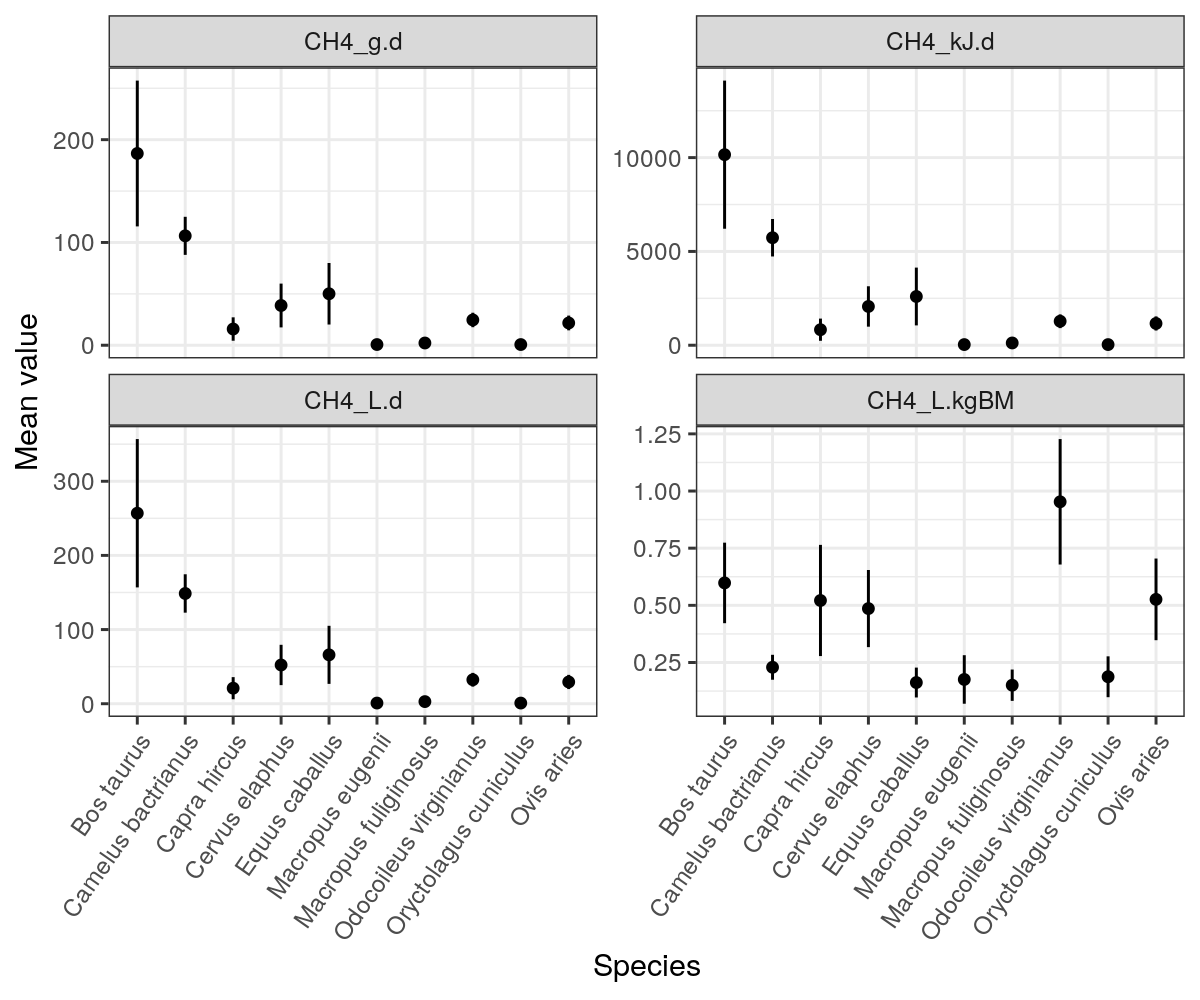

In [60]:
# formatting to long version
x = meth_f_s %>%
    dt_select(Species, dt_ends_with('_mean')) %>%
    dt_pivot_longer(cols = c(-Species), names_to = 'measure', values_to = 'mean_value') %>%
    dt_mutate(measure = gsub('_mean$', '', measure))
y = meth_f_s %>%
    dt_select(Species, dt_ends_with('_sd')) %>%
    dt_pivot_longer(cols = c(-Species), names_to = 'measure', values_to = 'sd_value')  %>%
    dt_mutate(measure = gsub('_sd$', '', measure))

meth_f_s_s = x %>%
    dt_inner_join(y, c('Species', 'measure'))

# plotting
p = meth_f_s_s %>%
    dt_mutate(Species = gsub('_', ' ', Species)) %>%
    ggplot(aes(Species, mean_value)) +
    geom_linerange(aes(ymin=mean_value-sd_value,
                       ymax=mean_value+sd_value)) +
    geom_point() +
    labs(y='Mean value') +
    facet_wrap(~ measure, scales='free_y') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=55, hjust=1)
    )

p.dims(6,5)
plot(p)

In [61]:
# adding values to metadata
host_meta = host_meta %>%
    dt_left_join(meth_f_s, c('scientific_name' = 'Species'))
host_meta

SampleID,host_subject_id,host_german_name,host_common_name,scientific_name,scientific_name_subspecies,host_taxid,class,order,family,⋯,CH4_kJ.d_mean,CH4_kJ.d_sd,i.CH4_L.d_mean,i.CH4_L.d_sd,i.CH4_L.kgBM_mean,i.CH4_L.kgBM_sd,i.CH4_g.d_mean,i.CH4_g.d_sd,i.CH4_kJ.d_mean,i.CH4_kJ.d_sd
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F14_Common_Bream,F14,Brachse,Common.Bream,Abramis_brama,NA,38527,Actinopterygii,Cypriniformes,Cyprinidae,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
F35_Red_Deer,F35,Rothirsch,Red.Deer,Cervus_elaphus,NA,9860,Mammalia,Artiodactyla,Cervidae,⋯,2066.942,1075.505,52.24132,27.18306,0.4858472,0.1686955,38.67117,21.30162,2066.942,1075.505
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X189_fail_Rainbow_Trout,189.fail,Regenbogenforelle,Rainbow.Trout,Oncorhynchus_mykiss,NA,8022,Actinopterygii,Salmoniformes,Salmonidae,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
X232_fail_Brown_Trout,232.fail,Seeforelle,Brown.Trout,Salmo_trutta,NA,8032,Actinopterygii,Salmoniformes,Salmonidae,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


# Filtering metadata

In [62]:
# original and updated metadata
overlap(physeq_arch_IndD %>% sample_data %>% .$SampleID,
        host_meta %>% dt_pull(SampleID))

intersect(x,y): 185 
setdiff(x,y): 0 
setdiff(y,x): 290 
union(x,y): 475 


In [63]:
# filtering to just 16S samples
x = physeq_arch_IndD %>% sample_data %>% .$SampleID
host_meta_f = host_meta %>%
    dt_filter(SampleID %in% x)
host_meta_f   

SampleID,host_subject_id,host_german_name,host_common_name,scientific_name,scientific_name_subspecies,host_taxid,class,order,family,⋯,CH4_kJ.d_mean,CH4_kJ.d_sd,i.CH4_L.d_mean,i.CH4_L.d_sd,i.CH4_L.kgBM_mean,i.CH4_L.kgBM_sd,i.CH4_g.d_mean,i.CH4_g.d_sd,i.CH4_kJ.d_mean,i.CH4_kJ.d_sd
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F14_Common_Bream,F14,Brachse,Common.Bream,Abramis_brama,NA,38527,Actinopterygii,Cypriniformes,Cyprinidae,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
F35_Red_Deer,F35,Rothirsch,Red.Deer,Cervus_elaphus,NA,9860,Mammalia,Artiodactyla,Cervidae,⋯,2066.942,1075.505,52.24132,27.18306,0.4858472,0.1686955,38.67117,21.30162,2066.942,1075.505
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X67_European_Roe,67,Reh,European.Roe,Capreolus_capreolus,NA,9858,Mammalia,Artiodactyla,Cervidae,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
X96_European_Hare,96,Feldhase,European.Hare,Lepus_europaeus,NA,9983,Mammalia,Lagomorpha,Leporidae,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


# Updating phyloseq objects

## IndD

In [64]:
# physeq object overview
physeq_arch_IndD

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1891 taxa and 185 samples ]
sample_data() Sample Data:       [ 185 samples by 74 sample variables ]
tax_table()   Taxonomy Table:    [ 1891 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1891 tips and 1888 internal nodes ]

In [65]:
# updating metadata
x = host_meta_f %>%
    as.data.frame
rownames(x) = x$SampleID
sample_data(physeq_arch_IndD) = x
physeq_arch_IndD %>% sample_data %>% colnames

[1] "SampleID"                       "host_subject_id"               
 [3] "host_german_name"               "host_common_name"              
 [5] "scientific_name"                "scientific_name_subspecies"    
 [7] "host_taxid"                     "class"                         
 [9] "order"                          "family"                        
[11] "genus"                          "sample_type"                   
[13] "sex"                            "pregnant_animal"               
[15] "age"                            "host_body_temp"                
[17] "disease_stat"                   "body_habitat"                  
[19] "body_product"                   "No_individuals"                
[21] "species_replicates"             "indiv_coreset"                 
[23] "duplicates_group"               "duplicates_common_name"        
[25] "pass_fail_info"                 "coreset"                       
[27] "population_species"             "ruminant"                      
[29] "pseudoruminants"                "wild_domesticated"             
[31] "captive_wild"                   "captive_wild_exp"              
[33] "captive_origin"                 "geo_loc_name"                  
[35] "country"                        "region"                        
[37] "location"                       "location_detail"               
[39] "latitude"                       "longitude"                     
[41] "elev"                           "geo_feature"                   
[43] "geo_feature_detail_1"           "geo_feature_detail_2"          
[45] "geo_feature_detail_3"           "geo_feature_detail_4"          
[47] "habitat"                        "habitat_detail"                
[49] "habitat_detail_1"               "habitat_detail_2"              
[51] "biome"                          "diet_detail"                   
[53] "diet_breadth"                   "diet_breadth_gabrielle"        
[55] "diet_vertebrate"                "diet_invertebrate"             
[57] "diet_fruit"                     "diet_flowers_nectar_pollen"    
[59] "diet_leaves_branches_bark_buds" "diet_seeds"                    
[61] "diet_grass_waterplants"         "diet_roots_tubers"             
[63] "temp_regulation"                "collection_date"               
[65] "season"                         "samp_store_days"               
[67] "samp_collect_device"            "sampling_method"               
[69] "diet"                           "feeding_style"                 
[71] "digestive_system"               "digestive_system_detail"       
[73] "CH4_L.d_mean"                   "CH4_L.d_sd"                    
[75] "CH4_L.kgBM_mean"                "CH4_L.kgBM_sd"                 
[77] "CH4_g.d_mean"                   "CH4_g.d_sd"                    
[79] "CH4_kJ.d_mean"                  "CH4_kJ.d_sd"                   
[81] "i.CH4_L.d_mean"                 "i.CH4_L.d_sd"                  
[83] "i.CH4_L.kgBM_mean"              "i.CH4_L.kgBM_sd"               
[85] "i.CH4_g.d_mean"                 "i.CH4_g.d_sd"                  
[87] "i.CH4_kJ.d_mean"                "i.CH4_kJ.d_sd"

In [66]:
# over-writing file
saveRDS(physeq_arch_IndD, physeq_arch_IndD_file)
cat('File written:', physeq_arch_IndD_file, '\n')

File written: /ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/merged/phyloseq/physeq_arch_IndD.RDS 


## SpecD

In [67]:
# physeq object overview
physeq_arch_SpecD

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1151 taxa and 110 samples ]
sample_data() Sample Data:       [ 110 samples by 74 sample variables ]
tax_table()   Taxonomy Table:    [ 1151 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1151 tips and 1150 internal nodes ]

In [68]:
# checking overlap
overlap(sample_names(physeq_arch_SpecD), host_meta_f %>% dt_pull(SampleID))

intersect(x,y): 110 
setdiff(x,y): 0 
setdiff(y,x): 75 
union(x,y): 185 


In [69]:
# getting samples
host_meta_f_SpecD = host_meta_f %>%
    dt_filter(SampleID %in% sample_names(physeq_arch_SpecD))
host_meta_f_SpecD

SampleID,host_subject_id,host_german_name,host_common_name,scientific_name,scientific_name_subspecies,host_taxid,class,order,family,⋯,CH4_kJ.d_mean,CH4_kJ.d_sd,i.CH4_L.d_mean,i.CH4_L.d_sd,i.CH4_L.kgBM_mean,i.CH4_L.kgBM_sd,i.CH4_g.d_mean,i.CH4_g.d_sd,i.CH4_kJ.d_mean,i.CH4_kJ.d_sd
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F14_Common_Bream,F14,Brachse,Common.Bream,Abramis_brama,NA,38527,Actinopterygii,Cypriniformes,Cyprinidae,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
F44_Fallow_Deer,F44,Damhirsch,Fallow.Deer,Dama_dama,NA,30532,Mammalia,Artiodactyla,Cervidae,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X73_One_humped_Camel,73,Dromedar,One.humped.Camel,Camelus_dromedarius,NA,9838,Mammalia,Artiodactyla,Camelidae,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
X67_European_Roe,67,Reh,European.Roe,Capreolus_capreolus,NA,9858,Mammalia,Artiodactyla,Cervidae,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [70]:
# updating metadata
x = host_meta_f_SpecD %>%
    as.data.frame
rownames(x) = x$SampleID
sample_data(physeq_arch_SpecD) = x
physeq_arch_SpecD %>% sample_data %>% colnames

[1] "SampleID"                       "host_subject_id"               
 [3] "host_german_name"               "host_common_name"              
 [5] "scientific_name"                "scientific_name_subspecies"    
 [7] "host_taxid"                     "class"                         
 [9] "order"                          "family"                        
[11] "genus"                          "sample_type"                   
[13] "sex"                            "pregnant_animal"               
[15] "age"                            "host_body_temp"                
[17] "disease_stat"                   "body_habitat"                  
[19] "body_product"                   "No_individuals"                
[21] "species_replicates"             "indiv_coreset"                 
[23] "duplicates_group"               "duplicates_common_name"        
[25] "pass_fail_info"                 "coreset"                       
[27] "population_species"             "ruminant"                      
[29] "pseudoruminants"                "wild_domesticated"             
[31] "captive_wild"                   "captive_wild_exp"              
[33] "captive_origin"                 "geo_loc_name"                  
[35] "country"                        "region"                        
[37] "location"                       "location_detail"               
[39] "latitude"                       "longitude"                     
[41] "elev"                           "geo_feature"                   
[43] "geo_feature_detail_1"           "geo_feature_detail_2"          
[45] "geo_feature_detail_3"           "geo_feature_detail_4"          
[47] "habitat"                        "habitat_detail"                
[49] "habitat_detail_1"               "habitat_detail_2"              
[51] "biome"                          "diet_detail"                   
[53] "diet_breadth"                   "diet_breadth_gabrielle"        
[55] "diet_vertebrate"                "diet_invertebrate"             
[57] "diet_fruit"                     "diet_flowers_nectar_pollen"    
[59] "diet_leaves_branches_bark_buds" "diet_seeds"                    
[61] "diet_grass_waterplants"         "diet_roots_tubers"             
[63] "temp_regulation"                "collection_date"               
[65] "season"                         "samp_store_days"               
[67] "samp_collect_device"            "sampling_method"               
[69] "diet"                           "feeding_style"                 
[71] "digestive_system"               "digestive_system_detail"       
[73] "CH4_L.d_mean"                   "CH4_L.d_sd"                    
[75] "CH4_L.kgBM_mean"                "CH4_L.kgBM_sd"                 
[77] "CH4_g.d_mean"                   "CH4_g.d_sd"                    
[79] "CH4_kJ.d_mean"                  "CH4_kJ.d_sd"                   
[81] "i.CH4_L.d_mean"                 "i.CH4_L.d_sd"                  
[83] "i.CH4_L.kgBM_mean"              "i.CH4_L.kgBM_sd"               
[85] "i.CH4_g.d_mean"                 "i.CH4_g.d_sd"                  
[87] "i.CH4_kJ.d_mean"                "i.CH4_kJ.d_sd"

In [71]:
# over-writing file
saveRDS(physeq_arch_SpecD, physeq_arch_SpecD_file)
cat('File written:', physeq_arch_SpecD_file, '\n')

File written: /ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/merged/phyloseq/physeq_arch_SpecD.RDS 


# Host tree

In [72]:
# tree and updated metadata
overlap(host_meta_f %>% dt_pull(scientific_name), host_tree$tip.label)

intersect(x,y): 110 
setdiff(x,y): 0 
setdiff(y,x): 89 
union(x,y): 199 


In [73]:
# pruning
to_rm = setdiff(host_tree$tip.label, host_meta_f %>% dt_pull(scientific_name))
host_tree_f = ape::drop.tip(host_tree, to_rm)
host_tree_f


Phylogenetic tree with 110 tips and 109 internal nodes.

Tip labels:
	Leuciscus_cephalus, Rutilus_rutilus, Leuciscus_idus, Blicca_bjoerkna, Abramis_brama, Cyprinus_carpio, ...
Node labels:
	, @_20_@, @_17_@, @_14_@, @_9_@, @_15_@, ...

Rooted; includes branch lengths.

In [74]:
# checking overlap
overlap(host_meta_f %>% dt_pull(scientific_name), host_tree_f$tip.label)

intersect(x,y): 110 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 110 


In [75]:
F = file.path(dirname(host_tree_file), 'unified_metadata_complete_200429_16S-arch.nwk')
write.tree(host_tree_f, F)
cat('File written:', F, '\n')

File written: /ebio/abt3_projects/Georg_animal_feces/data/animal/phylogeny/TT/unified_metadata_complete_200429_16S-arch.nwk 


## Expanding tips: IndD

* one tip per sample

In [76]:
# as list
x = host_meta_f %>%
    dt_distinct(scientific_name, SampleID) %>%
    dt_group_split(SampleID)
x %>% length

[1] 185

In [77]:
# adding samples as tips
host_tree_all = host_tree_f
for(y in x){
    parent_node = y %>% dt_pull(scientific_name) %>% .[1]
    child_node = y %>% dt_pull(SampleID) %>% .[1]

    host_tree_all = phytools::bind.tip(host_tree_all, child_node, edge.length=1e-9, 
                       where=which(host_tree_all$tip.label == parent_node), 
                       position=1e-9)
}
host_tree_all


Phylogenetic tree with 295 tips and 294 internal nodes.

Tip labels:
	Leuciscus_cephalus, X60_European_Chub, Rutilus_rutilus, X179_Roach, Leuciscus_idus, X330_Ide, ...
Node labels:
	, @_20_@, @_17_@, @_14_@, @_9_@, NA, ...

Rooted; includes branch lengths.

In [78]:
# removing scientific name tips
to_rm = host_meta_f %>% dt_pull(scientific_name) %>% unique
host_tree_all = ape::drop.tip(host_tree_all, to_rm)
host_tree_all


Phylogenetic tree with 185 tips and 184 internal nodes.

Tip labels:
	X60_European_Chub, X179_Roach, X330_Ide, X327_Silver_Bream, X326_Silver_Bream, F14_Common_Bream, ...
Node labels:
	, @_20_@, @_17_@, @_14_@, @_9_@, @_15_@, ...

Rooted; includes branch lengths.

In [79]:
# writing tree
F = file.path(dirname(host_tree_file), 'unified_metadata_complete_200429_16S-arch_IndD.nwk')
write.tree(host_tree_all, F)
cat('File written:', F, '\n')

File written: /ebio/abt3_projects/Georg_animal_feces/data/animal/phylogeny/TT/unified_metadata_complete_200429_16S-arch_IndD.nwk 


# sessionInfo

In [80]:
sessionInfo()

R version 3.6.2 (2019-12-12)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.4 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects/Georg_animal_feces/envs/phyloseq-phy/lib/libopenblasp-r0.3.7.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] LeyLabRMisc_0.1.5 tidytable_0.4.1   readxl_1.3.1      ape_5.3          
[5] phyloseq_1.30.0   ggplot2_3.2.1     tidyr_1.0.0       dplyr_0.8.3      

loaded via a namespace (and not attached):
 [1] nlme_3.1-143            repr_1.0.2              numDeriv_2016.8-1.1    
 [4] t